<a href="https://colab.research.google.com/github/Sowmya-2348562/Advanced-Data-Analytics/blob/main/2348562_image_filtering%26classification_n_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

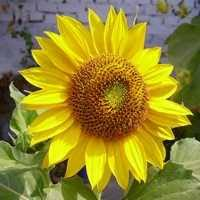

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread('/content/adatask.jpeg')
cv2_imshow(image)

Original Image


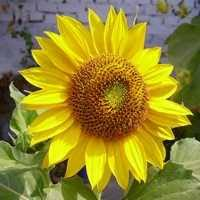

Linear-Filtered image


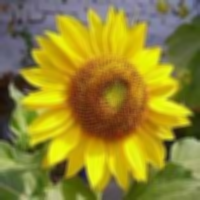

In [ ]:
import numpy as np
print("Original Image")
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()
kernel = np.ones((5, 5), np.float32) / 25
filtered_image = cv2.filter2D(image, -1, kernel)
print("Linear-Filtered image")
cv2_imshow(filtered_image)


Original Image


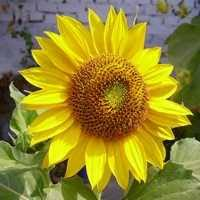

Mean-Filtered Image


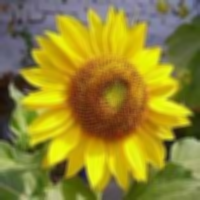

In [ ]:
print("Original Image")
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()
kernel = np.ones((5, 5), np.float32) / 25
mean_filtered_image = cv2.blur(image, (5, 5))
print("Mean-Filtered Image")
cv2_imshow(mean_filtered_image)

Original Image


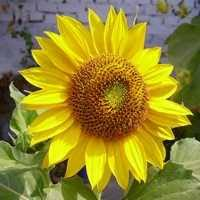

Gaussian-Filtered Image


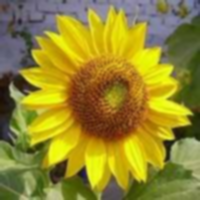

In [ ]:
print("Original Image")
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()
gaussian_filtered_image = cv2.GaussianBlur(image, (5, 5), 0)
print("Gaussian-Filtered Image")
cv2_imshow(gaussian_filtered_image)

Original Image


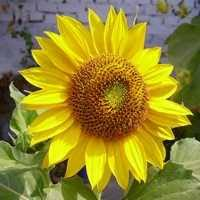

Sobel-Filtered Image in x direction


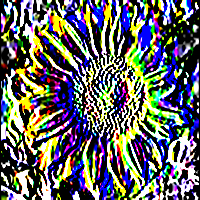

Sobel-Filtered Image in y direction


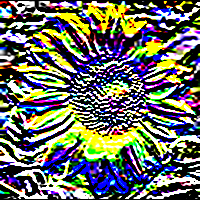

In [ ]:
print("Original Image")
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()
sobelx = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(image,cv2.CV_64F,0,1,ksize=5)
print("Sobel-Filtered Image in x direction")
cv2_imshow(sobelx)
cv2.waitKey(0)
cv2.destroyAllWindows()
print("Sobel-Filtered Image in y direction")
cv2_imshow(sobely)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import zipfile
zip_file = zipfile.ZipFile('/content/archive.zip')
zip_file.extractall()

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
image_path = '/content/Reduced MNIST Data/Reduced Testing data/0/781.jpg'
image = cv2.imread(image_path)
if image is not None:
  cv2_imshow(image)
  cv2.waitKey(0)
  cv2.destroyAllWindows()
else:
  print("Failed to load the image. Check the file path.")

In [ ]:
import cv2
import numpy as np
import os
img_height = 28
img_width = 28

# preprocessing function
def preprocess_image(image_path):
    # Read the image using OpenCV
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize the image to the desired dimensions
    resized = cv2.resize(gray, (img_height, img_width))

    # Normalize the pixel values to be between 0 and 1
    normalized = resized / 255.0

    # Return the preprocessed image
    return normalized

# Define the dataset path
root_dir = '/content/Reduced MNIST Data'

# Create lists to store the preprocessed images and labels
preprocessed_images = []
labels = []

# Iterate over the dataset folders
for folder in ['Reduced Testing data', 'Reduced Trainging data']:
    folder_path = os.path.join(root_dir, folder)
    if os.path.exists(folder_path) and os.path.isdir(folder_path):
        # Iterate over the label folders (0-9)
        for label in range(10):
            label_folder_path = os.path.join(folder_path, str(label))
            if os.path.exists(label_folder_path) and os.path.isdir(label_folder_path):
                # Iterate over the image files in the label folder
                for filename in os.listdir(label_folder_path):
                    image_path = os.path.join(label_folder_path, filename)
                    preprocessed_image = preprocess_image(image_path)
                    preprocessed_images.append(preprocessed_image)
                    labels.append(label)

# Convert the lists to numpy arrays
preprocessed_images = np.array(preprocessed_images)
labels = np.array(labels)

print("Preprocessed images shape:", preprocessed_images.shape)
print("Labels shape:", labels.shape)

Preprocessed images shape: (12000, 28, 28)
Labels shape: (12000,)


In [ ]:
import os
import cv2
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Define the filtering functions
def linear_filter(image):
    blurred = cv2.blur(image, (5, 5))
    return blurred

def nonlinear_filter(image):
    _, thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return thresh

def filter_set1(image):
    return linear_filter(image), nonlinear_filter(image)

def filter_set2(image):
    return cv2.GaussianBlur(image, (5, 5), 0), cv2.Canny(image, 50, 150)

def filter_set3(image):
    return cv2.medianBlur(image, 5), cv2.Sobel(image, cv2.CV_8U, 1, 0, ksize=3)

# Define the filter sets
filter_sets = [filter_set1, filter_set2, filter_set3]

root_dir = '/content/Reduced MNIST Data'
image_paths = []
labels = []

for folder in ['Reduced Testing data', 'Reduced Trainging data']:
    folder_path = os.path.join(root_dir, folder)
    if os.path.exists(folder_path) and os.path.isdir(folder_path):
        for label in range(10):  # 0 to 9
            label_folder_path = os.path.join(folder_path, str(label))
            if os.path.exists(label_folder_path) and os.path.isdir(label_folder_path):
                for filename in os.listdir(label_folder_path):
                    image_path = os.path.join(label_folder_path, filename)
                    image_paths.append(image_path)
                    labels.append(label)
    else:
        print(f"Folder {folder} does not exist")

X = []
y = []

for image_path, label in zip(image_paths, labels):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply each filter set to the image
    filtered_images = []
    for filter_set in filter_sets:
        filtered_image1, filtered_image2 = filter_set(image)
        filtered_images.extend([filtered_image1, filtered_image2])

    # Flatten the filtered images into a single feature vector
    feature_vector = np.concatenate([img.flatten() for img in filtered_images])

    X.append(feature_vector)
    y.append(label)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the machine learning models
models = [SVC(), RandomForestClassifier(), KNeighborsClassifier()]

# Train and evaluate each model with each filter set
accuracies = []
for model in models:
    model_accuracies = []
    for filter_set in filter_sets:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        model_accuracies.append(accuracy)
    accuracies.append(model_accuracies)

# Print the accuracy results
print("Accuracy Results:")
for i, model in enumerate(models):
    print(f"Model: {model.__class__.__name__}")
    for j, filter_set in enumerate(filter_sets):
        print(f"  Filter Set {j+1}: {accuracies[i][j]:.3f}")
    print()

Accuracy Results:
Model: SVC
  Filter Set 1: 0.963
  Filter Set 2: 0.963
  Filter Set 3: 0.963

Model: RandomForestClassifier
  Filter Set 1: 0.948
  Filter Set 2: 0.949
  Filter Set 3: 0.952

Model: KNeighborsClassifier
  Filter Set 1: 0.943
  Filter Set 2: 0.943
  Filter Set 3: 0.943



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode

In [ ]:
mist = fetch_openml('mnist_784', version=1)
X=mist.data
y=mist.target.astype(int)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_pca)
clusters=kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
labels = np.zeros_like(clusters)
for i in range(n_clusters):
    mask = (clusters == i)
    labels[mask] = mode(y[mask])[0]

In [ ]:
accuracy = accuracy_score(y, labels)
print(f'Clustering accuracy:{accuracy*100:.2f}%')

Clustering accuracy:52.64%


In [ ]:
def plot_digits(data,clusters,num_images=10):
  fig,axes = plt.subplots(num_images, n_clusters, figsize=(n_clusters,num_images))
  for i in range(num_images):
    for j in range(n_clusters):
      axes[i,j].imshow(data[clusters == j][i].reshape(28,28),cmap='gray')
      axes[i,j].axis('off')


plt.show()

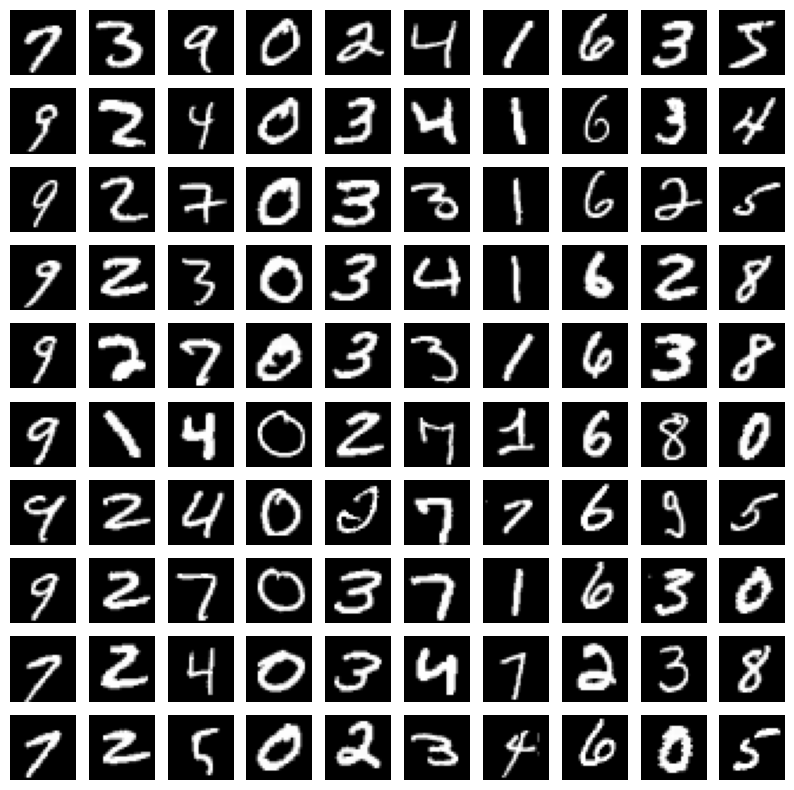

In [ ]:
plot_digits(X.values,clusters)